<a href="https://colab.research.google.com/github/rahulll-gif/task1/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (2).zip to archive (2) (2).zip
['.config', 'archive (2).zip', 'archive (2) (1).zip', 'archive (2) (2).zip', 'Housing.csv', 'sample_data']
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1  

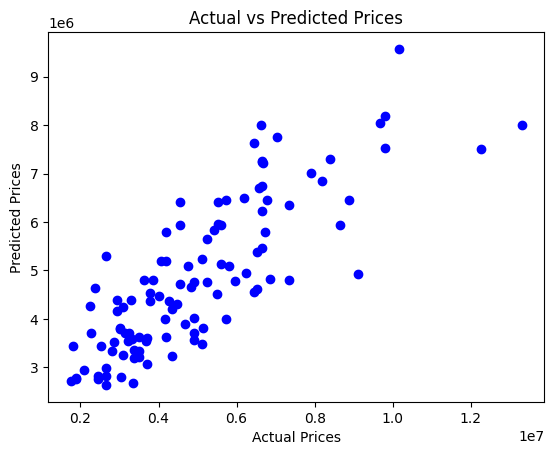

                   Coefficient
area              2.358488e+02
bedrooms          7.857449e+04
bathrooms         1.097117e+06
stories           4.062232e+05
mainroad          3.668242e+05
guestroom         2.331468e+05
basement          3.931598e+05
hotwaterheating   6.878813e+05
airconditioning   7.855506e+05
parking           2.257565e+05
prefarea          6.299017e+05
furnishingstatus  2.103971e+05


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files
uploaded = files.upload()
import zipfile
import io

for fn in uploaded.keys():
    zip_filename = fn

with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as zip_ref:
    zip_ref.extractall('/content/')
import os
print(os.listdir('/content'))
data = pd.read_csv('/content/Housing.csv')
data.head()
print(data.isnull().sum())
yes_no_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in yes_no_columns:
    data[col] = data[col].map({'yes':1, 'no':0})
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished':2, 'semi-furnished':1, 'unfurnished':0})
print(data.head())
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
